In [54]:
import folium
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Create a map centered on Europe
map = folium.Map(location=[51.165691, 10.451526], zoom_start=6)

In [13]:
Europe_2019 = pd.read_csv("EU_routes_2019.csv.gz")

In [71]:
# Load the data containing the locations' names, latitude, and longitude GER 2019
Germany_2019 = Europe_2019.loc[(Europe_2019['origin_country'] == 'Germany') & (Europe_2019['destination_city'] == "Berlin")]

In [72]:
Germany_2019

,origin_IATA,destination_IATA,weight,rec_aircrafts,rec_days,origin_airport_name,origin_city,origin_country,origin_ICAO,origin_latitude,origin_longitude,origin_continent,destination_airport_name,destination_city,destination_country,destination_ICAO,destination_latitude,destination_longitude,destination_continent
1353,BFE,SXF,1,1,1,Bielefeld Airport,Bielefeld,Germany,EDLI,51.964720,8.544444,EU,Berlin-Schönefeld Airport,Berlin,Germany,EDDB,52.3800,13.5225,EU
2259,BRE,SXF,1,1,1,Bremen Airport,Bremen,Germany,EDDW,53.047500,8.786670,EU,Berlin-Schönefeld Airport,Berlin,Germany,EDDB,52.3800,13.5225,EU
2263,BRE,TXL,1,1,1,Bremen Airport,Bremen,Germany,EDDW,53.047500,8.786670,EU,Berlin-Tegel Airport,Berlin,Germany,EDDT,52.5597,13.2877,EU
2929,BWE,SXF,3,3,5,Braunschweig-Wolfsburg Airport,Braunschweig,Germany,EDVE,52.319200,10.556100,EU,Berlin-Schönefeld Airport,Berlin,Germany,EDDB,52.3800,13.5225,EU
2931,BWE,TXL,1,1,1,Braunschweig-Wolfsburg Airport,Braunschweig,Germany,EDVE,52.319200,10.556100,EU,Berlin-Tegel Airport,Berlin,Germany,EDDT,52.5597,13.2877,EU
3412,CGN,SXF,11,11,17,Cologne Bonn Airport,Cologne,Germany,EDDK,50.865900,7.142740,EU,Berlin-Schönefeld Airport,Berlin,Germany,EDDB,52.3800,13.5225,EU
3417,CGN,TXL,43,71,30,Cologne Bonn Airport,Cologne,Germany,EDDK,50.865900,7.142740,EU,Berlin-Tegel Airport,Berlin,Germany,EDDT,52.5597,13.2877,EU
3994,DRS,SXF,2,2,2,Dresden Airport,Dresden,Germany,EDDC,51.132800,13.767200,EU,Berlin-Schönefeld Airport,Berlin,Germany,EDDB,52.3800,13.5225,EU
3995,DRS,TXL,2,2,2,Dresden Airport,Dresden,Germany,EDDC,51.132800,13.767200,EU,Berlin-Tegel Airport,Berlin,Germany,EDDT,52.5597,13.2877,EU
4083,DTM,SXF,5,5,5,Dortmund Airport,Dortmund,Germany,EDLW,51.518300,7.612240,EU,Berlin-Schönefeld Airport,Berlin,Germany,EDDB,52.3800,13.5225,EU


In [73]:
# Create edges
for i, edge in Germany_2019.iterrows():
    folium.PolyLine([[edge['origin_latitude'], edge['origin_longitude']],
                     [edge['destination_latitude'], edge['destination_longitude']]],
                    weight=edge['weight'],
                    color='blue',
                    opacity=0.6).add_to(map)


In [74]:
# Create markers for nodes
for i, node in Germany_2019.iterrows():
    folium.Marker([node['origin_latitude'], node['origin_longitude']], 
                  popup=str(node['weight'])).add_to(map)

In [75]:
map

# Plotted network without German map

In [29]:
df = Germany_2019

In [34]:
df = df.rename(columns={'origin_airport_name': "source","destination_airport_name" : "target"})

In [36]:
df = df[['source', 'target', 'weight']]

In [37]:
df

,source,target,weight
0,Aachen-Merzbrück Airport,Mönchengladbach Airport,3
1,Aachen-Merzbrück Airport,Frankfurt-Egelsbach Airport,1
191,Augsburg Airport,Bremen Airport,1
193,Augsburg Airport,Cologne Bonn Airport,2
194,Augsburg Airport,Dresden Airport,1
...,...,...,...
14290,Donaueschingen-Villingen Airport,Zweibrücken Airport,1
14292,Zweibrücken Airport,Altenburg-Nobitz Airport,1
14294,Zweibrücken Airport,Düsseldorf Airport,2
14301,Zweibrücken Airport,Mönchengladbach Airport,1


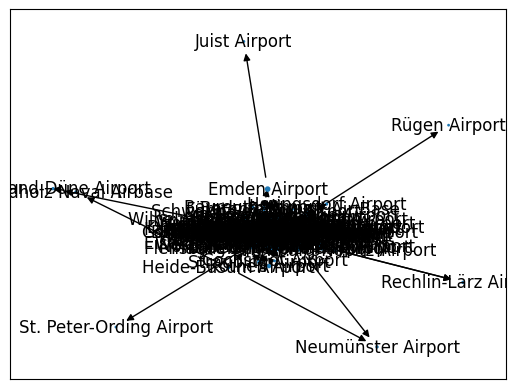

In [76]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


# Create the graph
G = nx.DiGraph()

# Add the edges to the graph
for index, row in df.iterrows():
    G.add_edge(row["source"], row["target"], weight=row["weight"])

  

# Get the node weights
weights = [d[1] for d in G.degree()]

# Calculate the positions of the nodes
pos = nx.fruchterman_reingold_layout(G)

# Plot the graph
nx.draw_networkx_nodes(G, pos, node_size=weights)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Show the plot
plt.show()